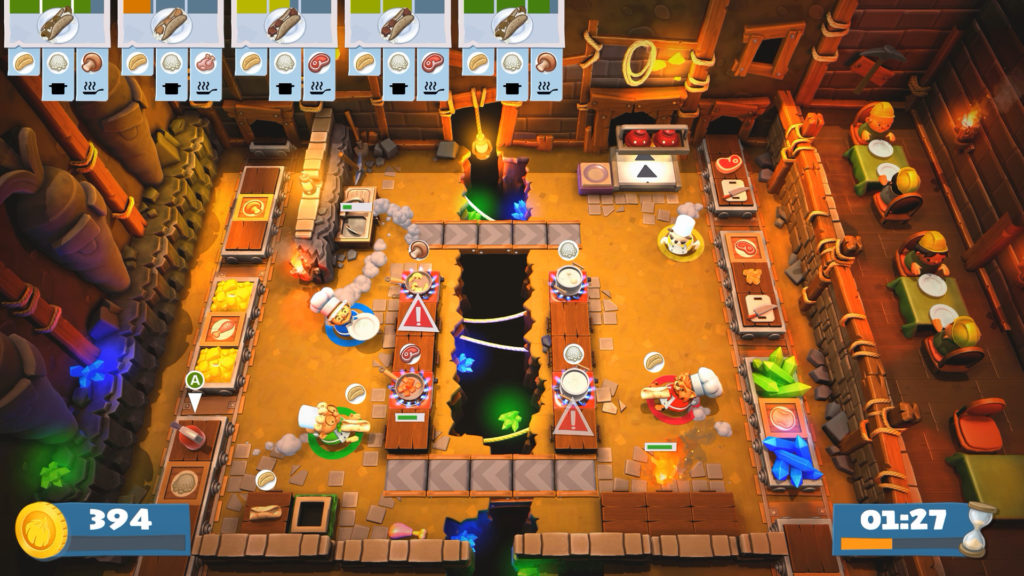

In [1]:
from IPython import display
display.Image("https://www.gamespace.com/wp-content/uploads/2020/09/Overcooked-2-1024x576.jpg")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time
from datetime import datetime
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, plot_roc_curve, roc_auc_score, f1_score, recall_score, precision_score

sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

In [3]:
food = pd.read_json('./data/train.json')
test = pd.read_json('./data/test.json')

In [4]:
hyph_ing = [] 
for l in food['ingredients']:
    new_list = []
    for item in l:
        item = item.split(' ')
        new_list.append('-'.join(item))
    hyph_ing.append(new_list)
    
hyph_test = [] 
for l in test['ingredients']:
    new_list = []
    for item in l:
        item = item.split(' ')
        new_list.append('-'.join(item))
    hyph_test.append(new_list)

food['hyph_ing'] = hyph_ing
test['hyph_ing'] = hyph_test
food['hyph_ing'] = food['hyph_ing'].map(lambda x: ", ".join(x))
test['hyph_ing'] = test['hyph_ing'].map(lambda x: ", ".join(x))

food['hyph_ing']

0        romaine-lettuce, black-olives, grape-tomatoes,...
1        plain-flour, ground-pepper, salt, tomatoes, gr...
2        eggs, pepper, salt, mayonaise, cooking-oil, gr...
3                        water, vegetable-oil, wheat, salt
4        black-pepper, shallots, cornflour, cayenne-pep...
                               ...                        
39769    light-brown-sugar, granulated-sugar, butter, w...
39770    KRAFT-Zesty-Italian-Dressing, purple-onion, br...
39771    eggs, citrus-fruit, raisins, sourdough-starter...
39772    boneless-chicken-skinless-thigh, minced-garlic...
39773    green-chile, jalapeno-chilies, onions, ground-...
Name: hyph_ing, Length: 39774, dtype: object

In [5]:
cvec_food = food['hyph_ing']
cvec = CountVectorizer(min_df=0, max_df=1.0, ngram_range= (1,1))
cvec.fit(cvec_food)
cvec_food = cvec.transform(cvec_food)
cvec_food = pd.DataFrame(cvec_food.todense(), columns=cvec.get_feature_names())
cvec_food.head()

,00,10,100,14,15,25,33,40,43,95,...,za,zatarain,zatarains,zero,zest,zesty,zinfandel,ziti,zucchini,épices
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
tvec_food = food['hyph_ing']
tvec = TfidfVectorizer(min_df = 0, max_df = 1.0, ngram_range = (1, 1))
tvec.fit(tvec_food)
tvec_food = tvec.transform(tvec_food)
tvec_food = pd.DataFrame(tvec_food.todense(), columns = tvec.get_feature_names())
tvec_food.head()

,00,10,100,14,15,25,33,40,43,95,...,za,zatarain,zatarains,zero,zest,zesty,zinfandel,ziti,zucchini,épices
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


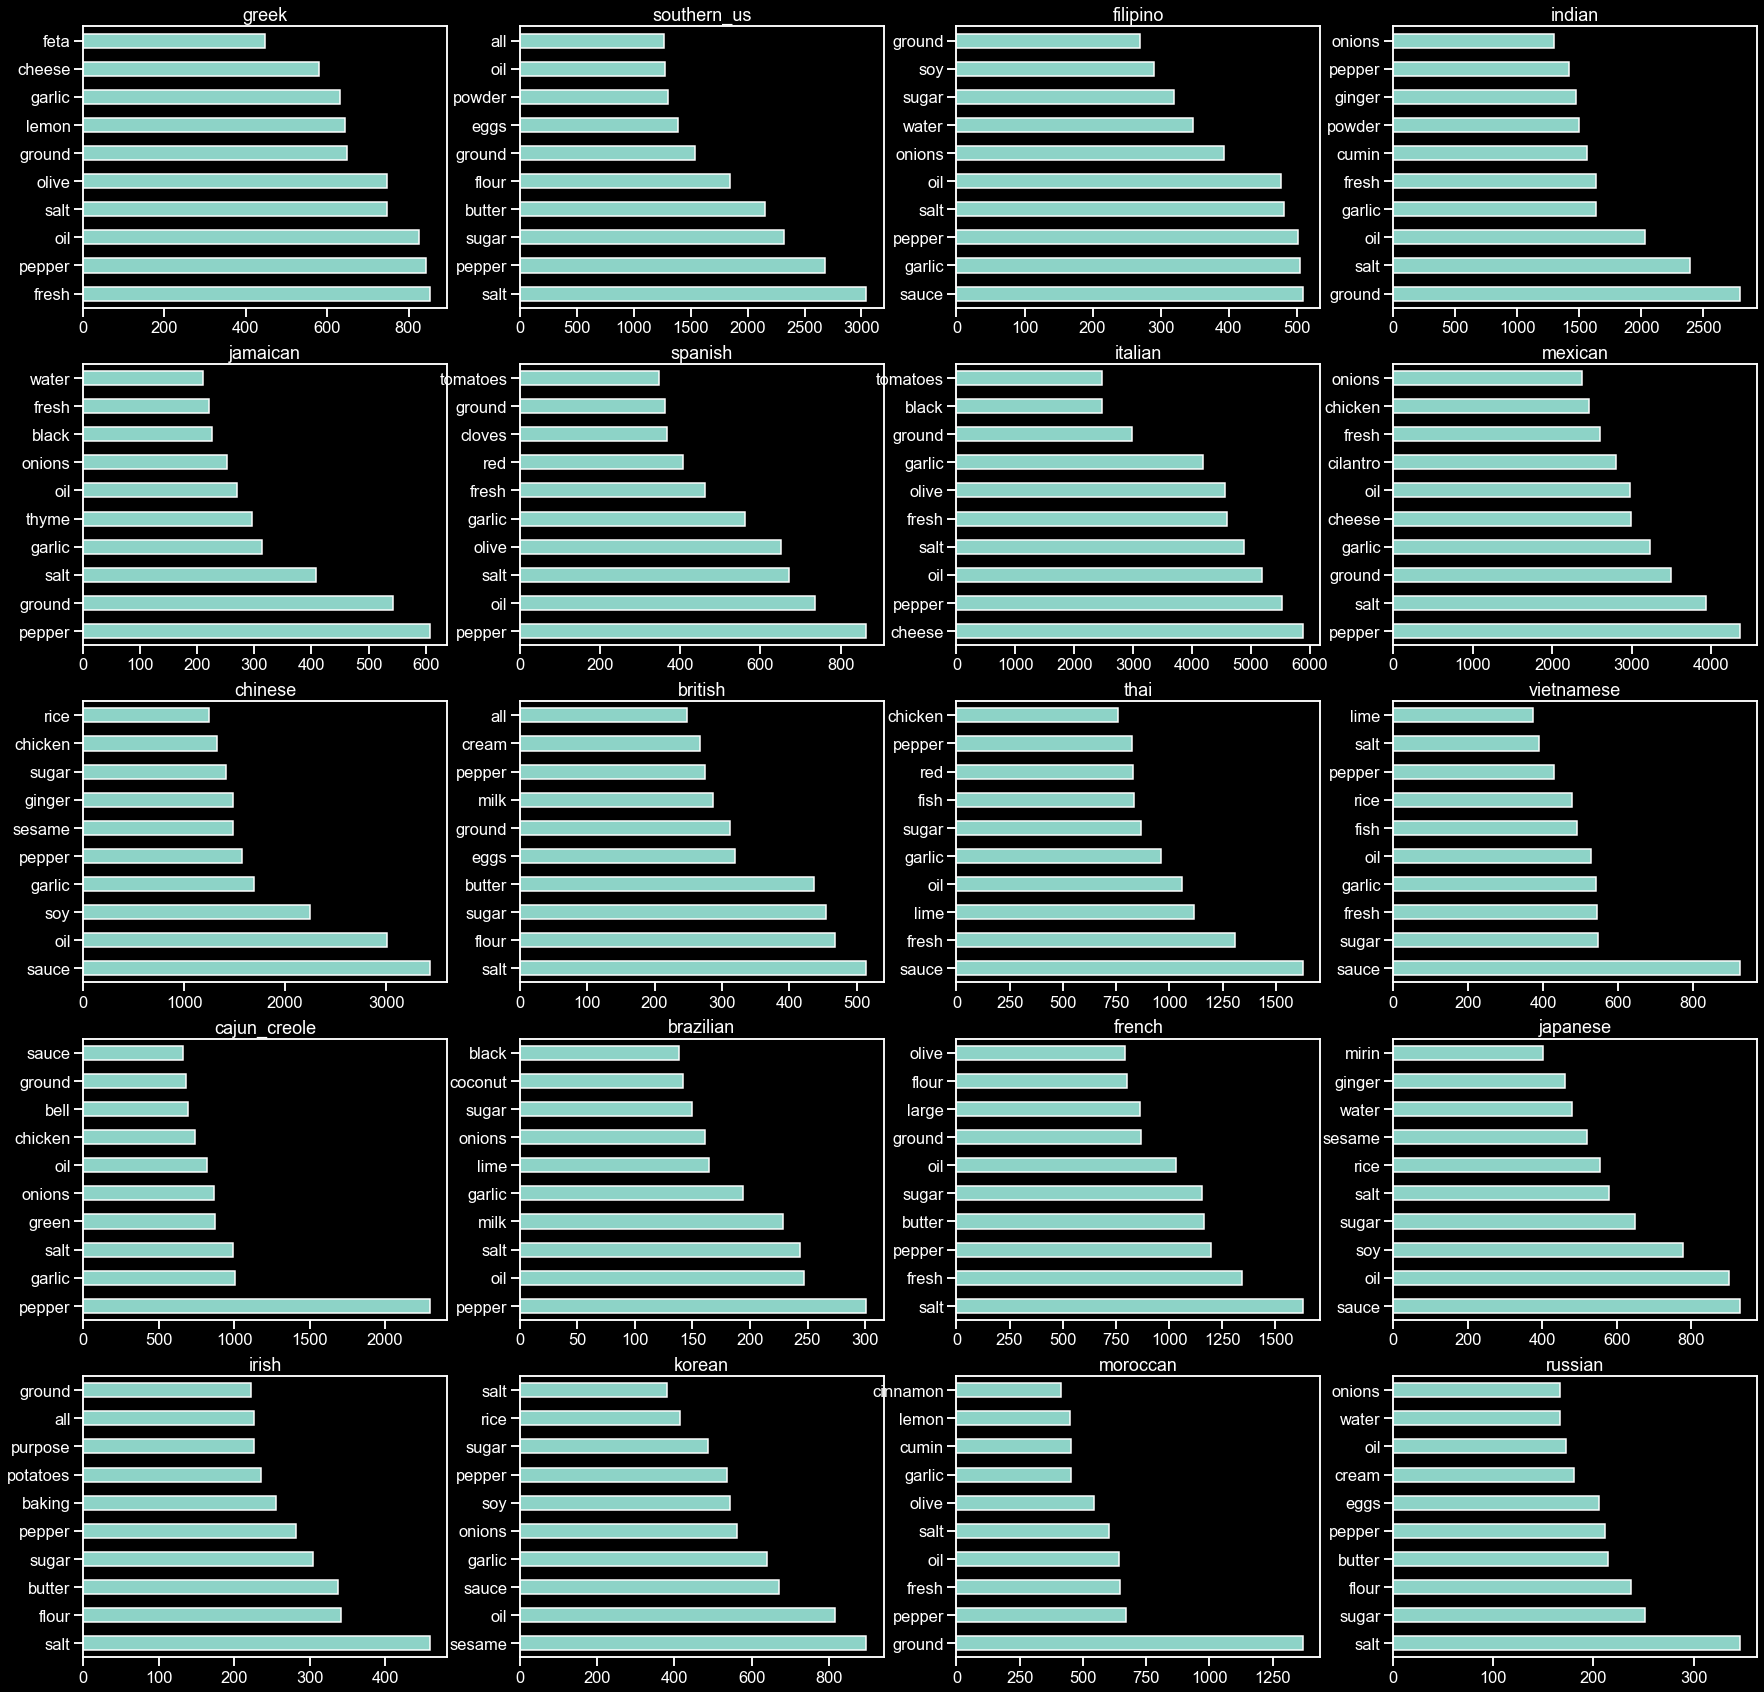

In [7]:
plt.figure(figsize = (30, 30))
for i,nationality in enumerate(food['cuisine'].unique()):
    plt.subplot(5, 4, i+1)
    cvec_food.loc[food['cuisine'] == nationality].sum().sort_values(ascending = False).head(10).plot(kind = 'barh')
    plt.title(nationality)

In [8]:
for i,nationality in enumerate(food['cuisine'].unique()):
    print('nationality:', nationality)
    print('--------------------------')
    print(cvec_food.loc[food['cuisine'] == nationality].sum().sort_values(ascending = False).head(10))
    print('--------------------------')
    print('--------------------------')

nationality: greek
--------------------------
fresh     852
pepper    844
oil       825
salt      747
olive     746
ground    650
lemon     644
garlic    631
cheese    581
feta      448
dtype: int64
--------------------------
--------------------------
nationality: southern_us
--------------------------
salt      3043
pepper    2680
sugar     2318
butter    2155
flour     1847
ground    1542
eggs      1386
powder    1302
oil       1277
all       1264
dtype: int64
--------------------------
--------------------------
nationality: filipino
--------------------------
sauce     509
garlic    505
pepper    502
salt      481
oil       476
onions    393
water     348
sugar     319
soy       290
ground    269
dtype: int64
--------------------------
--------------------------
nationality: indian
--------------------------
ground    2792
salt      2390
oil       2031
garlic    1637
fresh     1636
cumin     1563
powder    1500
ginger    1475
pepper    1413
onions    1294
dtype: int64
------------

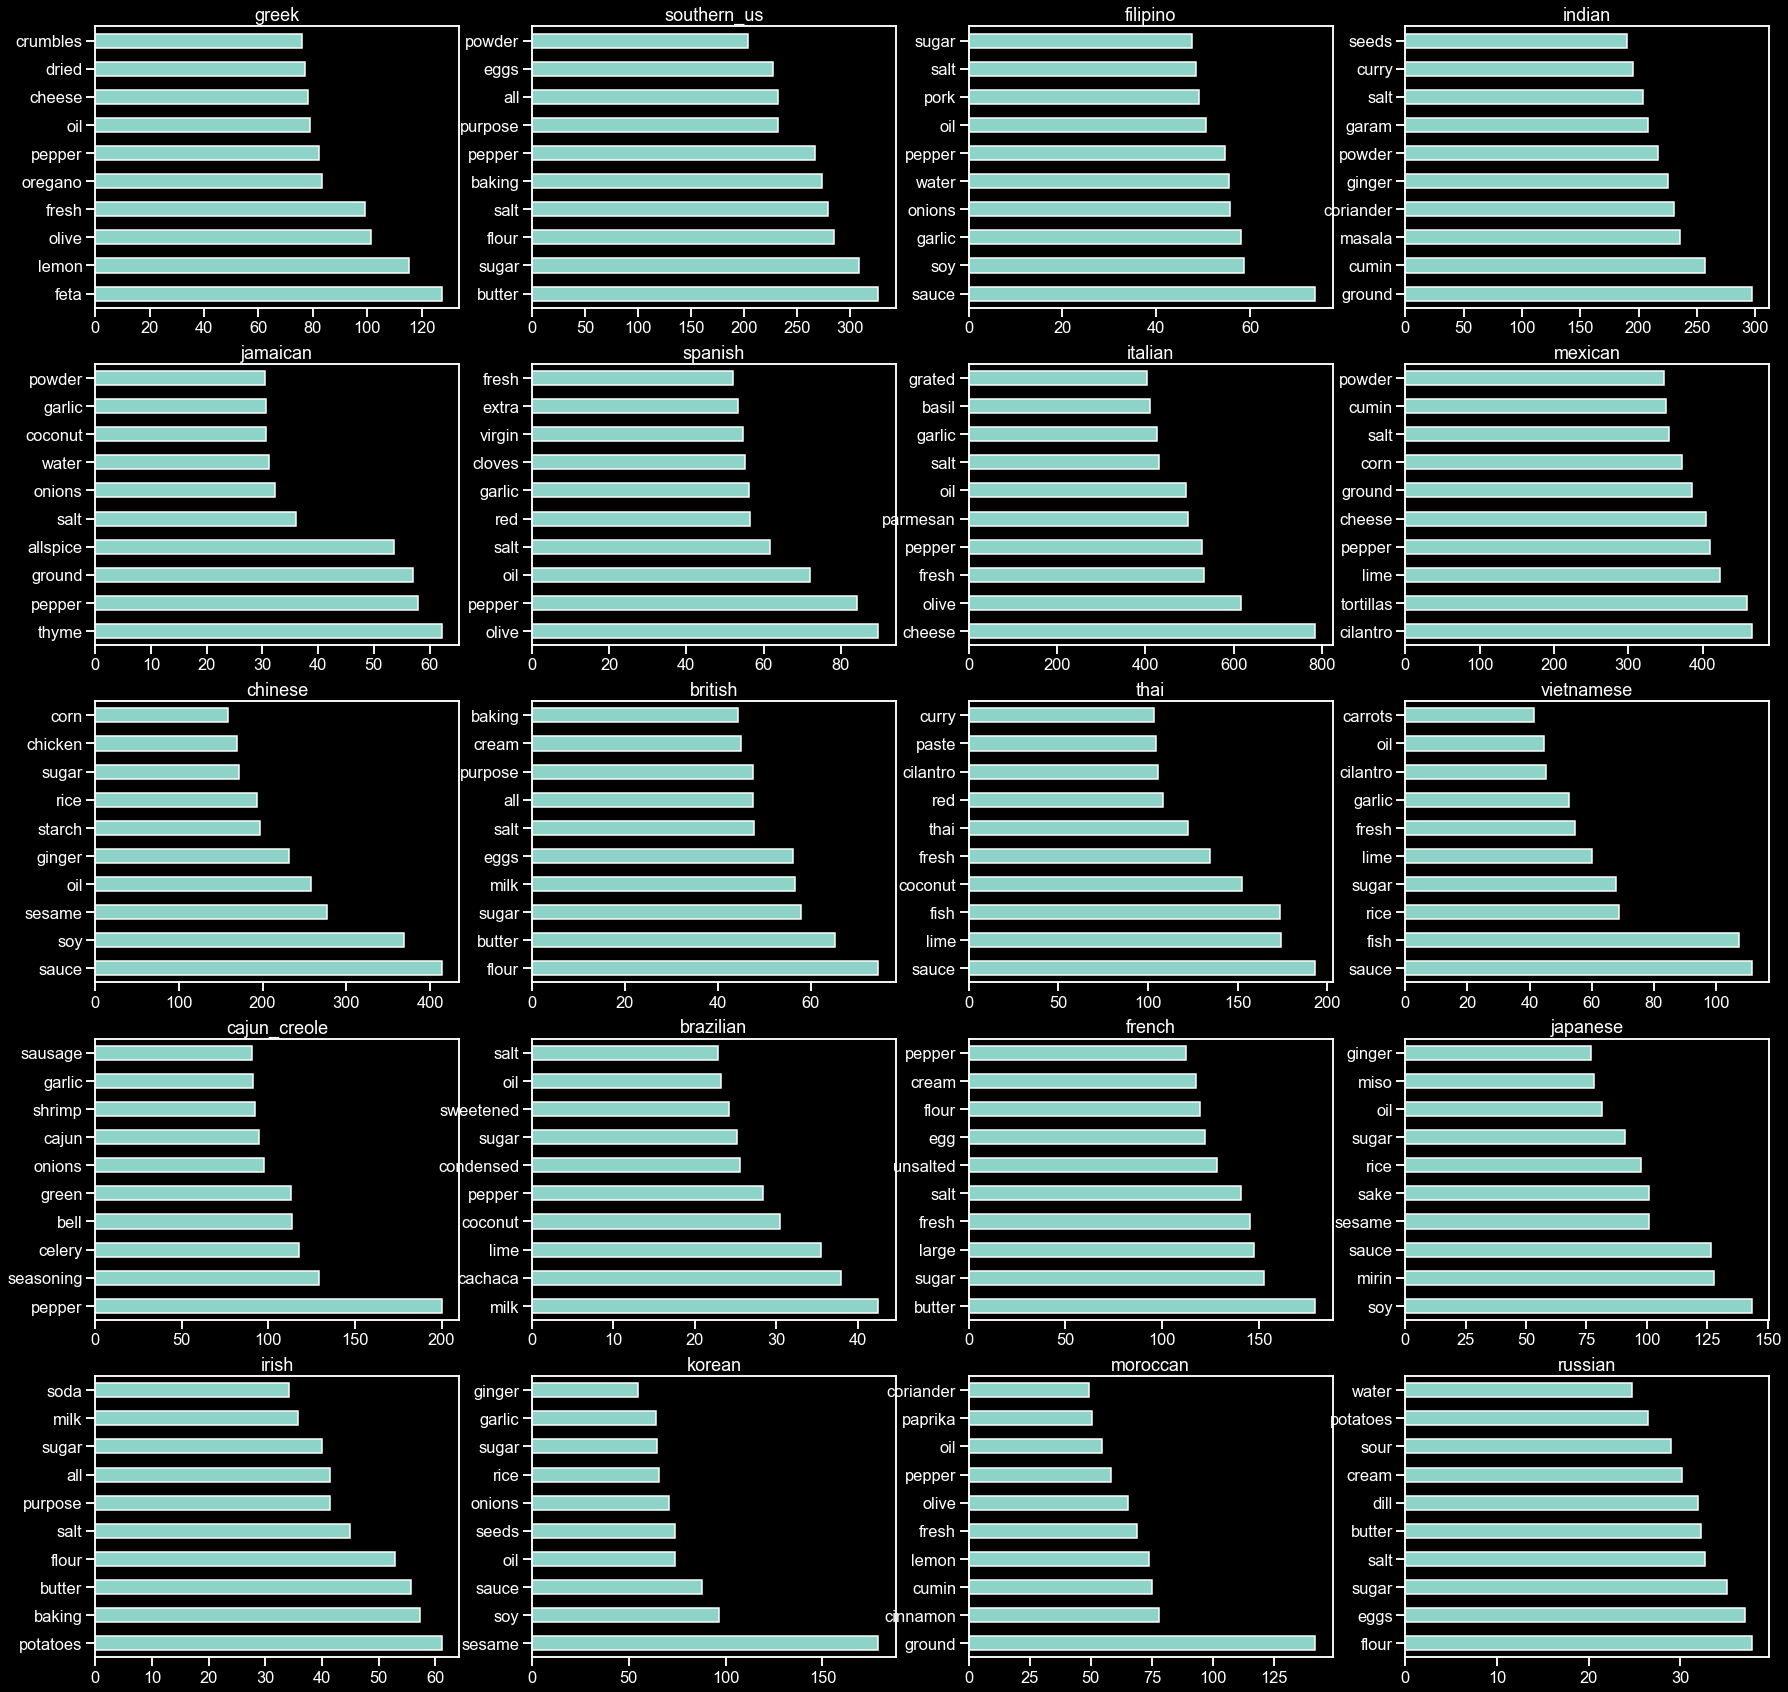

In [9]:
plt.figure(figsize = (30, 30))
for i,nationality in enumerate(food['cuisine'].unique()):
    plt.subplot(5, 4, i+1)
    tvec_food.loc[food['cuisine'] == nationality].sum().sort_values(ascending = False).head(10).plot(kind = 'barh')
    plt.title(nationality)

In [10]:
top_dict = {}
all_ing = []
for i,nationality in enumerate(food['cuisine'].unique()):
    print('nationality:', nationality)
    print('--------------------------')
    print(tvec_food.loc[food['cuisine'] == nationality].sum().sort_values(ascending = False).head(10))
    print('--------------------------')
    print('--------------------------')
    top_dict[nationality] = (tvec_food.loc[food['cuisine'] == nationality].sum().sort_values(ascending = False).head(10)).index.tolist()
    all_ing.append(top_dict[nationality][:])

nationality: greek
--------------------------
feta        127.387236
lemon       115.271712
olive       101.451172
fresh        99.133859
oregano      83.423148
pepper       82.373054
oil          79.105888
cheese       78.342773
dried        77.079436
crumbles     75.843113
dtype: float64
--------------------------
--------------------------
nationality: southern_us
--------------------------
butter     326.591970
sugar      308.575847
flour      284.244634
salt       278.986420
baking     273.349722
pepper     266.890246
purpose    232.284979
all        232.176694
eggs       227.619715
powder     203.195252
dtype: float64
--------------------------
--------------------------
nationality: filipino
--------------------------
sauce     73.889579
soy       58.727991
garlic    58.178008
onions    55.793695
water     55.445417
pepper    54.580260
oil       50.711563
pork      49.043379
salt      48.521550
sugar     47.704887
dtype: float64
--------------------------
-----------------------

In [11]:
# Chloe's code
food['cuisine'] = food['cuisine'].map({
    'italian'     : 1,
    'mexican'     : 2,
    'southern_us' : 3,
    'indian'      : 4,
    'chinese'     : 5,
    'french'      : 6,
    'cajun_creole': 7,
    'thai'        : 8,
    'japanese'    : 9,
    'greek'       : 10,
    'spanish'     : 11,
    'korean'      : 12,
    'vietnamese'  : 13,
    'moroccan'    : 14,
    'british'     : 15,
    'filipino'    : 16,
    'irish'       : 17,
    'jamaican'    : 18,
    'russian'     : 19,
    'brazilian'   : 20,
})

In [12]:
food.cuisine.value_counts(normalize=True)

1     0.197063
2     0.161865
3     0.108614
4     0.075502
5     0.067205
6     0.066526
7     0.038870
8     0.038694
9     0.035777
10    0.029542
11    0.024865
12    0.020868
13    0.020742
14    0.020642
15    0.020214
16    0.018982
17    0.016770
18    0.013225
19    0.012294
20    0.011741
Name: cuisine, dtype: float64

In [13]:
## getting a smaller sample of our datast
fraction = 1
smol = food.sample(n=int(food.shape[0]*fraction), replace=False, random_state=42)
smol.shape

(39774, 4)

In [14]:
X_train = smol.hyph_ing
y_train = smol.cuisine
test_ids = test.id
X_test = test.hyph_ing
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [15]:
pipe = Pipeline([
    ("tvec", TfidfVectorizer(
#                             stop_words='english',
#                             min_df=3,
#                             max_df=0.6,
                            )),
#     ("sc", StandardScaler(with_mean=False)),
    ("vc", VotingClassifier(estimators=[
                                        ('logreg', LogisticRegression(solver='sag',
                                                            multi_class='ovr')),
                                        ('svc', SVC(degree=2, kernel='rbf', random_state=42,
                                                    probability=True)),
#                                        ('knc', KNeighborsClassifier())
    ],))
#                             weights=[1, 2, 2],
#                             weights=[1, 2],
#                             voting='soft'
#     )) 
                           ])

params = {
#     'vc__weights': [[1, 1, 1], [1, 2, 2], [2, 2, 1], [2, 1, 2]],
    'vc__voting': ['soft'],
    'tvec__max_df': [0.6],
    'tvec__max_features': [3000], #50_000
    'tvec__min_df': [3],
    'tvec__ngram_range': [(1, 1)],
    'vc__logreg__penalty': ['l2'],
    'vc__logreg__C': [8.8],
    'vc__logreg__max_iter': [2000],
#     'vc__logreg__solver': ['sag'],
#     'vc__logreg__l1_ratio': [0.2, 0.5, 0.8],
    'vc__svc__degree': [2], # 3 
    'vc__svc__max_iter': [1500], # 2000, 10, 1
    'vc__svc__C': [10],
#     'vc__svc__kernel': ['rbf'],
#     'vc__svc__decision_function_shape': ['ovr', 'ovo'],
#     'vc__knc__n_neighbors': [5, 25],
#     'vc__knc__p': [2],
#     'vc__knc__metric': ['minkowski'],
}


vc_gridsearch = GridSearchCV(pipe,
                            param_grid=params,
                            cv=5,
                            verbose=10,
                            n_jobs=-1)

In [16]:
# pipe.get_params()

In [ ]:
%%time
vc_gridsearch.fit(X_train, y_train)
print("Best Score:", vc_gridsearch.best_score_)
print("Best Estimator:", vc_gridsearch.best_estimator_)
print("Best Parameters:", vc_gridsearch.best_params_)
preds = vc_gridsearch.predict(X_test)
print("Train Score:", vc_gridsearch.score(X_train, y_train))
# print("Test Score:", vc_gridsearch.score(X_test, y_test))
print()
# rmse = mean_squared_error(y_test, preds, squared=False)
# print('Accuracy: ', accuracy_score(y_test, preds))

Fitting 50 folds for each of 1 candidates, totalling 50 fits


In [ ]:
test['cuisine'] = preds
kaggle_submission = test[['id', 'cuisine']].sort_values(by='id')
kaggle_submission['cuisine'] = kaggle_submission['cuisine'].map({
        1: 'italian',
        2: 'mexican',
        3: 'southern_us',
        4: 'indian',
        5: 'chinese',
        6: 'french',
        7: 'cajun_creole',
        8: 'thai',
        9: 'japanese',
        10: 'greek',
        11: 'spanish',
        12: 'korean',
        13: 'vietnamese',
        14: 'moroccan',
        15: 'british',
        16: 'filipino',
        17: 'irish',
        18: 'jamaican',
        19: 'russian',
        20: 'brazilian',
})
kaggle_submission.to_csv('./data/kaggle_submission___overcooked.csv', index=False)

In [ ]:
# Plot non-normalized confusion matrix
fig, ax = plt.subplots(figsize=(18, 18))
plot_confusion_matrix(vc_gridsearch, X_test, y_test, ax = ax, normalize ='true', values_format='.2f')

In [ ]:
display.Image('./images/rainbow_graph.png')

In [ ]:
display.Image('./images/image.png')

In [ ]:
plt.figure(figsize = (15, 5))
x = ['italian',
     'mexican',
     'southern_us',
     'indian',
     'chinese',
     'french',
     'cajun',
     'thai',
     'japanese',
     'greek',
     'spanish',
     'korean',
     'vietnamese',
     'moroccan',
     'british',
     'filipino',
     'irish',
     'jamaican',
     'russian',
     'brazilian']
y = [.9, .93, .8, .92, .86, .67, .74, .77, .74, .73, .51, .8, .6, .8, .5, .73, .56, .73, .47, .59]
sns.barplot(x, y)
plt.xticks(rotation = 40);
plt.title('Accuracy Rates by Cuisine Type', fontsize = 25)

In [ ]:
plt.figure(figsize = (15, 5))
x = ['italian',
     'mexican',
     'southern_us',
     'indian',
     'chinese',
     'french',
     'cajun',
     'thai',
     'japanese',
     'greek',
     'spanish',
     'korean',
     'vietnamese',
     'moroccan',
     'british',
     'filipino',
     'irish',
     'jamaican',
     'russian',
     'brazilian']
y = [.9, .93, .8, .92, .86, .67, .74, .77, .74, .73, .51, .8, .6, .8, .5, .73, .56, .73, .47, .59]
graph = pd.DataFrame(x, columns = ['Cuisine'])
graph['Accuracy'] = y
graph.sort_values(by = 'Accuracy', ascending=False, inplace = True)
sns.barplot(x = graph['Cuisine'], y = graph['Accuracy'])
plt.xticks(rotation = 40);
plt.title('Accuracy Rates by Cuisine Type', fontsize = 25)

If we'd performed as well on the kaggle test set as our own train test split test set, we'd have ended up 133rd of 1,387 teams 

In [ ]:
display.Image('./images/Kaggle133.png')

---
---
---

In [ ]:
xgb_pipe = Pipeline([
    ("tvec", TfidfVectorizer()),
    ("vc", VotingClassifier(estimators=[('xgb', XGBClassifier(label_encoder = False))],
                            voting='soft')) 
                                        ])
xgb_params = {
    'tvec__max_features': [5_000],
    'tvec__ngram_range': [(1, 1)],
    'tvec__max_df' : [0.6],
    'vc__xgb__max_estimators' : [150, 200],
    'vc__xgb__learning_rate' : [0.21],
    'vc__xgb__min_child_weight' : [10],
}
xgb_gridsearch = GridSearchCV(xgb_pipe,
                            param_grid=xgb_params,
                            cv=5,
                            verbose=10,
                            n_jobs=-1)

In [ ]:
%%time
xgb_gridsearch.fit(X_train, y_train)
print("Best Score:", xgb_gridsearch.best_score_)
print("Best Estimator:", xgb_gridsearch.best_estimator_)
print("Best Parameters:", xgb_gridsearch.best_params_)
preds = xgb_gridsearch.predict(X_test)
print("Train Score:", xgb_gridsearch.score(X_train, y_train))
print("Test Score:", xgb_gridsearch.score(X_test, y_test))
print()

---
---
---

In [ ]:
multilabel_confusion_matrix(y_test, preds)

In [ ]:
plot_confusion_matrix(vc_gridsearch, X_test, y_test)